Epoch 1/8
841/844 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8762 - loss: 0.4301
Epoch 1: val_accuracy improved from None to 0.97967, saving model to models/mnist_cnn_best.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9454 - loss: 0.1857 - val_accuracy: 0.9797 - val_loss: 0.0675
Epoch 2/8
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9811 - loss: 0.0597
Epoch 2: val_accuracy improved from 0.97967 to 0.98533, saving model to models/mnist_cnn_best.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9824 - loss: 0.0554 - val_accuracy: 0.9853 - val_loss: 0.0514
Epoch 3/8
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9872 - loss: 0.0410
Epoch 3: val_accuracy improved from 0.98533 to 0.98717, saving model to models/mnist_cnn_best.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9876 - loss: 0.0392 - val_accuracy: 0.9872 - val_loss: 0.0478
Epoch 4/8
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9907 - loss: 0.0304
Epoch 4: val_accuracy improved from 0.98717 to 0.98767, saving model to models/mnist_cnn_best.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - accuracy: 0.9907 - loss: 0.0295 - val_accuracy: 0.9877 - val_loss: 0.0478
Epoch 5/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9926 - loss: 0.0232
Epoch 5: val_accuracy improved from 0.98767 to 0.98850, saving model to models/mnist_cnn_best.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9930 - loss: 0.0224 - val_accuracy: 0.9885 - val_loss: 0.0445
Epoch 6/8
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9941 - loss: 0.0180
Epoch 6: val_accuracy improved from 0.98850 to 0.98867, saving model to models/mnist_cnn_best.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9942 - loss: 0.0178 - val_accuracy: 0.9887 - val_loss: 0.0455
Epoch 7/8
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9954 - loss: 0.0152
Epoch 7: val_accuracy improved from 0.98867 to 0.98983, saving model to models/mnist_cnn_best.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9898 - val_loss: 0.0397
Epoch 8/8
841/844 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9963 - loss: 0.0108
Epoch 8: val_accuracy improved from 0.98983 to 0.99083, saving model to models/mnist_cnn_best.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9960 - loss: 0.0117 - val_accuracy: 0.9908 - val_loss: 0.0392


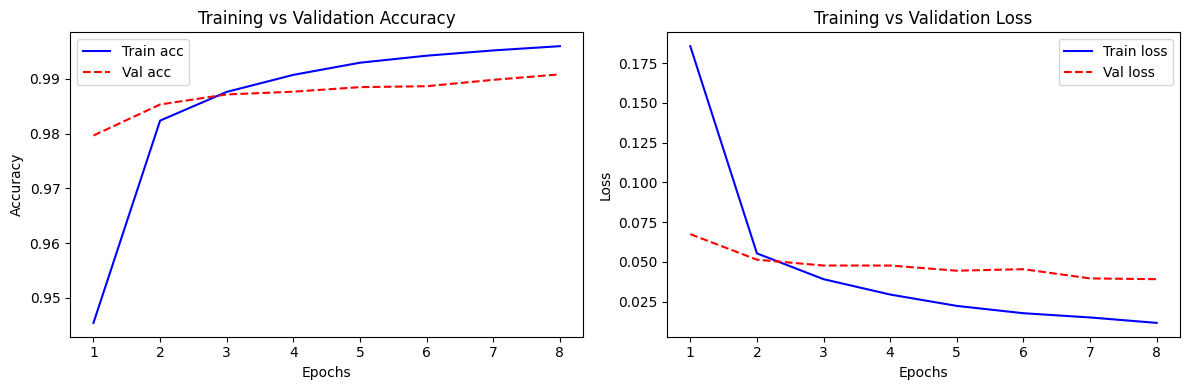

✅ Test acc: 0.9913
💾 Saved model to models/mnist_cnn_final.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


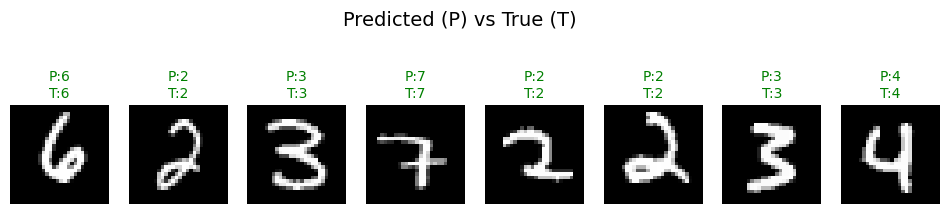

In [2]:
# mnist_cnn.py
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# -----------------------------
# Reproducibility
# -----------------------------
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# -----------------------------
# Folder setup
# -----------------------------
os.makedirs("models", exist_ok=True)

# -----------------------------
# Load & preprocess data
# -----------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype("float32") / 255.0
x_test  = x_test.reshape(-1,28,28,1).astype("float32") / 255.0

# -----------------------------
# Build CNN model
# -----------------------------
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()

# -----------------------------
# Callbacks
# -----------------------------
checkpoint_path = "models/mnist_cnn_best.h5"
cp_callback = callbacks.ModelCheckpoint(checkpoint_path, monitor="val_accuracy",
                                        save_best_only=True, verbose=1)

# -----------------------------
# Train
# -----------------------------
history = model.fit(x_train, y_train,
                    epochs=8,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[cp_callback])

# -----------------------------
# Plot training curves
# -----------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Train acc')
plt.plot(epochs, val_acc, 'r--', label='Val acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Train loss')
plt.plot(epochs, val_loss, 'r--', label='Val loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------
# Load best and evaluate
# -----------------------------
if os.path.exists(checkpoint_path):
    model = tf.keras.models.load_model(checkpoint_path)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test acc: {test_acc:.4f}")

# -----------------------------
# Save final model
# -----------------------------
model.save("models/mnist_cnn_final.h5")
print("💾 Saved model to models/mnist_cnn_final.h5")

# -----------------------------
# Show predictions on test images
# -----------------------------
indices = np.random.choice(len(x_test), 8, replace=False)
images = x_test[indices]
labels = y_test[indices]
preds = model.predict(images)
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(12,3))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(images[i].reshape(28,28), cmap='gray')
    color = 'green' if pred_labels[i]==labels[i] else 'red'
    plt.title(f"P:{pred_labels[i]}\nT:{labels[i]}", color=color, fontsize=10)
    plt.axis('off')
plt.suptitle("Predicted (P) vs True (T)", fontsize=14)
plt.show()
